**Data Extraction**

In [1]:
#import library 
import tweepy
import datetime
import pandas as pd
import numpy as np

In [8]:
#twitter account's info
consumer_key = "##################"
consumer_secret = "####################################################"
access_token ="#################################################"
access_token_secret ="###############################################"

In [3]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret )
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [13]:
#declaration of the days 
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=30)

In [10]:
tweets_list = tweepy.Cursor(api.search, lang='en', q="fast and furious 9 since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended').items()

In [11]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    output.append(line)

I’m watching Fast 9. And a car got hit on the left tail end and flipped into the air……….. Ayo defund the fast and furious franchise please
Fast and Furious 9 is one of the most ridiculous films I've ever seen 😂
RT @da13thsun: Th Soul may desire to test drive a Better Body like Ye love a new benz AMG...

This is NOT Your Assigned Vessel and must ret…
RT @da13thsun: Th Soul may desire to test drive a Better Body like Ye love a new benz AMG...

This is NOT Your Assigned Vessel and must ret…
Fast and Furious 9 is releasing from Today at @gvstudiocitytnj. Ticket Booking is going on at Theater Counter and Online at https://t.co/LCTYIZWFYQ
Screen : Shanthi 4K AC DTS, Shivaji 4K AC DTS
Language : Tamil 2D
#FastAndFurious9
#Theatersareback https://t.co/vJxgK5RksG
RT @da13thsun: Th Soul may desire to test drive a Better Body like Ye love a new benz AMG...

This is NOT Your Assigned Vessel and must ret…
RT @da13thsun: Th Soul may desire to test drive a Better Body like Ye love a new benz AMG...



In [12]:
import pandas as pd
df = pd.DataFrame(output)
df.to_csv('fast and furious 9.csv')

***Data cleaning ***

In [14]:
# Import all required libraries

import nltk
import numpy as np
import re
import pandas as pd 
import pylab as pl
import matplotlib.pyplot as plt

from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot

#plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

!pip install datashader
import datashader as ds
import datashader.transfer_functions as tf

     |████████████████████████████████| 125 kB 5.3 MB/s 
     |████████████████████████████████| 15.8 MB 576 bytes/s 
     |████████████████████████████████| 76 kB 3.7 MB/s 
     |████████████████████████████████| 778 kB 64.2 MB/s 
     |████████████████████████████████| 119 kB 52.4 MB/s 
     |████████████████████████████████| 776 kB 49.8 MB/s 
     |████████████████████████████████| 769 kB 48.3 MB/s 
     |████████████████████████████████| 766 kB 50.6 MB/s 
     |████████████████████████████████| 1.0 MB 57.5 MB/s 
     |████████████████████████████████| 722 kB 47.3 MB/s 
     |████████████████████████████████| 722 kB 50.8 MB/s 
     |████████████████████████████████| 715 kB 38.7 MB/s 
     |████████████████████████████████| 705 kB 33.9 MB/s 
     |████████████████████████████████| 699 kB 69.0 MB/s 
     |████████████████████████████████| 696 kB 56.3 MB/s 
     |████████████████████████████████| 684 kB 54.3 MB/s 
     |████████████████████████████████| 679 kB 50.0 MB/s 
     |████████

In [15]:
from google.colab import files
uploaded = files.upload()

Saving fast and furious 9.csv to fast and furious 9 (1).csv


In [16]:
import io
data= pd.read_csv(io.BytesIO(uploaded['fast and furious 9.csv']))
data['len'] = data['text'].str.len()

In [17]:
data.head()

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len
0,0,I’m watching Fast 9. And a car got hit on the ...,0,0,2021-09-01 23:10:31,138
1,1,Fast and Furious 9 is one of the most ridiculo...,1,0,2021-09-01 22:04:24,71
2,2,RT @da13thsun: Th Soul may desire to test driv...,0,36,2021-09-01 21:53:32,140
3,3,RT @da13thsun: Th Soul may desire to test driv...,0,36,2021-09-01 21:40:08,140
4,4,Fast and Furious 9 is releasing from Today at ...,15,1,2021-09-01 21:35:03,271


In [18]:
# Number of unique tweets
unique_text = data.text.unique()
print(len(unique_text))

622


In [19]:
# Number of unique users
unique_user = data['Unnamed: 0'].unique()
len(unique_user)

1021

In [20]:
data.text.count()

1021

In [22]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [23]:
data['Clean_text'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")

In [24]:
# remove special characters, numbers, punctuations
data['Clean_text'] = data['Clean_text'].str.replace("[^a-zA-Z#]", " ")

In [25]:
data['Clean_text'] = data['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [26]:
tokenized_tweet = data['Clean_text'].apply(lambda x: x.split())

In [27]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [watch, fast, left, tail, flip, into, defund, ...
1      [fast, furiou, most, ridicul, film, ever, seen]
2    [soul, desir, test, drive, better, bodi, like,...
3    [soul, desir, test, drive, better, bodi, like,...
4    [fast, furiou, releas, from, today, ticket, bo...
Name: Clean_text, dtype: object

In [28]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['Clean_text'] = tokenized_tweet

In [31]:
tok = WordPunctTokenizer()
pattern1 = r'@[A-Za-z0-9_]+'
pattern2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pattern1, pattern2))
print(combined_pat)

www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                 "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                 "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                 "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                 "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
print(neg_pattern)

@[A-Za-z0-9_]+|https?://[^ ]+
re.compile("\\b(isn't|aren't|wasn't|weren't|haven't|hasn't|hadn't|won't|wouldn't|don't|doesn't|didn't|can't|couldn't|shouldn't|mightn't|mustn't)\\b")


In [32]:
def tweet_cleaner_updated(text):
     soup = BeautifulSoup(text, 'lxml')   
     souped = soup.get_text()
   
     try:
         bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
     except:
         bom_removed = souped
     stripped = re.sub(combined_pat, '', bom_removed)
     stripped = re.sub(www_pat, '', stripped)
     #lower_case = stripped.lower()
     #neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
     neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], stripped)
     letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
     # During the letters_only process two lines above, it has created unnecessay white spaces,
     # I will tokenize and join together to remove unneccessary white spaces
     words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
     return (" ".join(words)).strip()

In [33]:
data.loc[:,('text','Clean_text')]

,text,Clean_text
0,I’m watching Fast 9. And a car got hit on the ...,watch fast left tail flip into defund fast fur...
1,Fast and Furious 9 is one of the most ridiculo...,fast furiou most ridicul film ever seen
2,RT @da13thsun: Th Soul may desire to test driv...,soul desir test drive better bodi like love be...
3,RT @da13thsun: Th Soul may desire to test driv...,soul desir test drive better bodi like love be...
4,Fast and Furious 9 is releasing from Today at ...,fast furiou releas from today ticket book go t...
...,...,...
1016,Fast and furious 9 was cruise to me sha..\n\nE...,fast furiou cruis enjoy cruis
1017,@IamMasikana Did you see the fast and furious 9?,fast furiou
1018,@StarseedTiffany Fast and Furious 9,fast furiou
1019,On the new sky ad with the animals. I’m only m...,with anim onli miss last quot taxi driver when...


In [34]:
data[data.text.isnull()]

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text


In [35]:
data[data.Clean_text.isnull()]

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text


In [36]:
# Number of unique tweets
unique_clean_text = data.Clean_text.unique()
unique_full_text = data.text.unique()
print(len(unique_clean_text))
print(len(unique_full_text))
print(len(data))

534
622
1021


In [37]:
data.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)

In [38]:
data.reset_index(drop=True,inplace=True)

In [39]:
data['Clean_text_length'] = data['Clean_text'].apply(len)
data.head()

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text,Clean_text_length
0,0,I’m watching Fast 9. And a car got hit on the ...,0,0,2021-09-01 23:10:31,138,watch fast left tail flip into defund fast fur...,64
1,1,Fast and Furious 9 is one of the most ridiculo...,1,0,2021-09-01 22:04:24,71,fast furiou most ridicul film ever seen,39
2,2,RT @da13thsun: Th Soul may desire to test driv...,0,36,2021-09-01 21:53:32,140,soul desir test drive better bodi like love be...,76
3,4,Fast and Furious 9 is releasing from Today at ...,15,1,2021-09-01 21:35:03,271,fast furiou releas from today ticket book go t...,165
4,7,@TorturedAlex Depending on your need to rechar...,1,0,2021-09-01 20:22:29,143,depend your need recharg alway find gattaca so...,93


,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text,Clean_text_length
0,0,I’m watching Fast 9. And a car got hit on the ...,0,0,2021-09-01 23:10:31,138,watch fast left tail flip into defund fast fur...,64
1,1,Fast and Furious 9 is one of the most ridiculo...,1,0,2021-09-01 22:04:24,71,fast furiou most ridicul film ever seen,39
2,2,RT @da13thsun: Th Soul may desire to test driv...,0,36,2021-09-01 21:53:32,140,soul desir test drive better bodi like love be...,76
3,4,Fast and Furious 9 is releasing from Today at ...,15,1,2021-09-01 21:35:03,271,fast furiou releas from today ticket book go t...,165
4,7,@TorturedAlex Depending on your need to rechar...,1,0,2021-09-01 20:22:29,143,depend your need recharg alway find gattaca so...,93


In [41]:
data[data['Clean_text_length']==0]['Clean_text'] ## Looks like these are tweets with different languages or just hastags.
# We can simply drop these tweets
list = data[data['Clean_text_length']==0]['Clean_text'].index
list

Int64Index([], dtype='int64')

In [42]:
data.drop(index = list,inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         534 non-null    int64 
 1   text               534 non-null    object
 2   favourite_count    534 non-null    int64 
 3   retweet_count      534 non-null    int64 
 4   created_at         534 non-null    object
 5   len                534 non-null    int64 
 6   Clean_text         534 non-null    object
 7   Clean_text_length  534 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 37.5+ KB


In [44]:
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         534 non-null    int64 
 1   text               534 non-null    object
 2   favourite_count    534 non-null    int64 
 3   retweet_count      534 non-null    int64 
 4   created_at         534 non-null    object
 5   len                534 non-null    int64 
 6   Clean_text         534 non-null    object
 7   Clean_text_length  534 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 33.5+ KB


***Data visualization***

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [46]:
print(data.shape)

(534, 8)


In [47]:
data.head()

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text,Clean_text_length
0,0,I’m watching Fast 9. And a car got hit on the ...,0,0,2021-09-01 23:10:31,138,watch fast left tail flip into defund fast fur...,64
1,1,Fast and Furious 9 is one of the most ridiculo...,1,0,2021-09-01 22:04:24,71,fast furiou most ridicul film ever seen,39
2,2,RT @da13thsun: Th Soul may desire to test driv...,0,36,2021-09-01 21:53:32,140,soul desir test drive better bodi like love be...,76
3,4,Fast and Furious 9 is releasing from Today at ...,15,1,2021-09-01 21:35:03,271,fast furiou releas from today ticket book go t...,165
4,7,@TorturedAlex Depending on your need to rechar...,1,0,2021-09-01 20:22:29,143,depend your need recharg alway find gattaca so...,93


In [48]:
data.isnull().any()

Unnamed: 0           False
text                 False
favourite_count      False
retweet_count        False
created_at           False
len                  False
Clean_text           False
Clean_text_length    False
dtype: bool

In [49]:
data['retweet_count'].unique()

array([   0,   36,    1,    7,    9,   10,   14,  422,    4,   18,   34,
          3,    2,    8,   39,   26,    6,   13,    5,   32,  237,   35,
         11, 3571,  425,   42])

In [50]:
data['favourite_count'].unique()

array([  0,   1,  15,   2,   3,  11,   5,  10,  16,   8,  51,  37,   7,
         4,   9,  22,   6,  23,  21,  19,  13,  91,  41,  14,  62,  74,
        26,  95,  20, 828,  47,  18,  25])

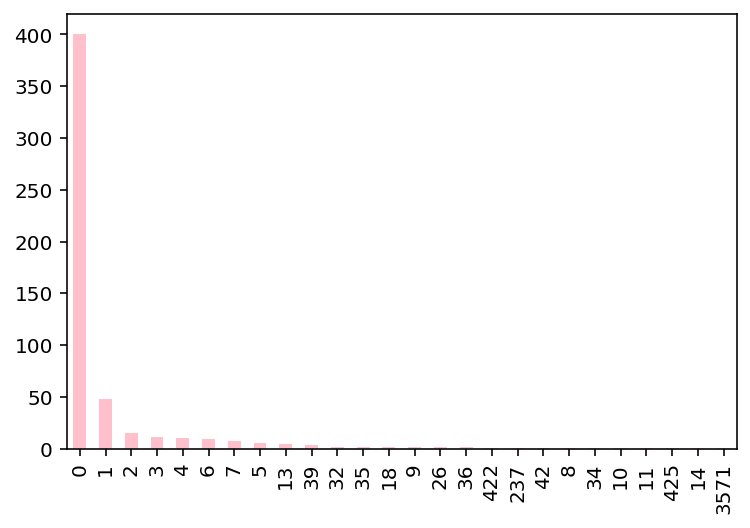

In [51]:
data['retweet_count'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

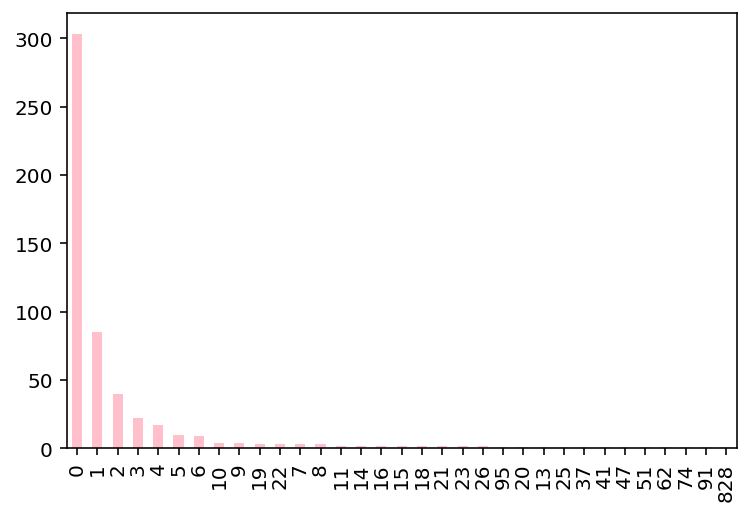

In [52]:
data['favourite_count'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [53]:
data.groupby('favourite_count').describe()

Unnamed: 0                           ... Clean_text_length               
                     count         mean         std  ...               50%     75%    max
favourite_count                                      ...                                 
0                    303.0   566.815182  318.809404  ...              59.0   81.00  208.0
1                     85.0   524.470588  324.145492  ...              69.0   96.00  216.0
2                     40.0   611.800000  264.552665  ...              75.5  113.25  189.0
3                     22.0   605.500000  288.797301  ...              65.5   97.25  163.0
4                     17.0   664.647059  286.377579  ...              53.0   97.00  205.0
5                     10.0   390.200000  286.837856  ...              68.0  100.75  182.0
6                      9.0   565.000000  283.767070  ...              74.0   95.00  169.0
7                      3.0   459.666667  326.380657  ...              83.0   84.00   85.0
8                      3.0   529.333333  466.714402  ...             100.0  135.00  170.0
9                      4.0   476.250000  252.017691  ...             139.0  153.75  162.0
10                     4.0   482.250000  318.835773  ...              51.5   85.75  163.0
11                     2.0   385.000000  483.661038  ...             108.5  108.75  109.0
13                     1.0   430.000000         NaN  ...             166.0  166.00  166.0
14                     2.0   559.500000  113.844192  ...             171.5  180.75  190.0
15                     2.0   437.500000  613.061579  ...             137.5  151.25  165.0
16                     2.0    81.500000   16.263456  ...             127.0  146.00  165.0
18                     2.0   821.500000   28.991378  ...             116.5  122.75  129.0
19                     3.0   690.333333  299.596951  ...             100.0  112.50  125.0
20                     1.0   561.000000         NaN  ...              54.0   54.00   54.0
21                     2.0   441.000000  294.156421  ...             142.0  152.00  162.0
22                     3.0   347.000000  222.582569  ...              96.0  116.50  137.0
23                     2.0   309.000000  110.308658  ...             177.5  191.75  206.0
25                     1.0  1007.000000         NaN  ...              82.0   82.00   82.0
26                     2.0   709.000000  260.215295  ...             140.5  148.25  156.0
37                     1.0   126.000000         NaN  ...             105.0  105.00  105.0
41                     1.0   471.000000         NaN  ...             145.0  145.00  145.0
47                     1.0   690.000000         NaN  ...             139.0  139.00  139.0
51                     1.0   101.000000         NaN  ...             173.0  173.00  173.0
62                     1.0   482.000000         NaN  ...             143.0  143.00  143.0
74                     1.0   508.000000         NaN  ...              82.0   82.00   82.0
91                     1.0   464.000000         NaN  ...              78.0   78.00   78.0
95                     1.0   540.000000         NaN  ...             210.0  210.00  210.0
828                    1.0   666.000000         NaN  ...             150.0  150.00  150.0

[33 rows x 32 columns]

In [54]:
data.groupby('retweet_count').describe()

Unnamed: 0                           ... Clean_text_length               
                   count         mean         std  ...               50%     75%    max
retweet_count                                      ...                                 
0                  400.0   582.255000  307.485794  ...              60.0   95.25  216.0
1                   48.0   558.083333  309.308827  ...              79.0  108.00  193.0
2                   15.0   529.466667  290.996285  ...              75.0  103.00  156.0
3                   11.0   570.454545  255.352448  ...              76.0  116.50  162.0
4                   10.0   136.800000  125.392539  ...              84.5  113.75  206.0
5                    5.0   581.800000  216.392468  ...             125.0  125.00  190.0
6                    9.0   379.666667  150.063320  ...              77.0  139.00  163.0
7                    7.0   582.857143  372.729763  ...              73.0   78.50  127.0
8                    1.0   183.000000         NaN  ...              50.0   50.00   50.0
9                    2.0   204.000000  258.801082  ...             113.5  131.25  149.0
10                   1.0    23.000000         NaN  ...              48.0   48.00   48.0
11                   1.0   887.000000         NaN  ...              26.0   26.00   26.0
13                   4.0   526.500000  308.084945  ...             112.0  156.25  166.0
14                   1.0    26.000000         NaN  ...              79.0   79.00   79.0
18                   2.0   451.500000  555.078823  ...              43.0   44.00   45.0
26                   2.0   337.000000  189.504617  ...             105.5  125.25  145.0
32                   2.0   410.500000  183.140656  ...             144.5  177.25  210.0
34                   1.0    74.000000         NaN  ...              85.0   85.00   85.0
35                   2.0   620.500000   64.346717  ...             116.5  133.25  150.0
36                   2.0    51.500000   70.003571  ...             124.5  148.75  173.0
39                   3.0   378.000000  164.790776  ...              78.0  110.50  143.0
42                   1.0  1020.000000         NaN  ...              62.0   62.00   62.0
237                  1.0   528.000000         NaN  ...              44.0   44.00   44.0
422                  1.0    33.000000         NaN  ...              48.0   48.00   48.0
425                  1.0  1008.000000         NaN  ...              56.0   56.00   56.0
3571                 1.0   998.000000         NaN  ...              40.0   40.00   40.0

[26 rows x 32 columns]

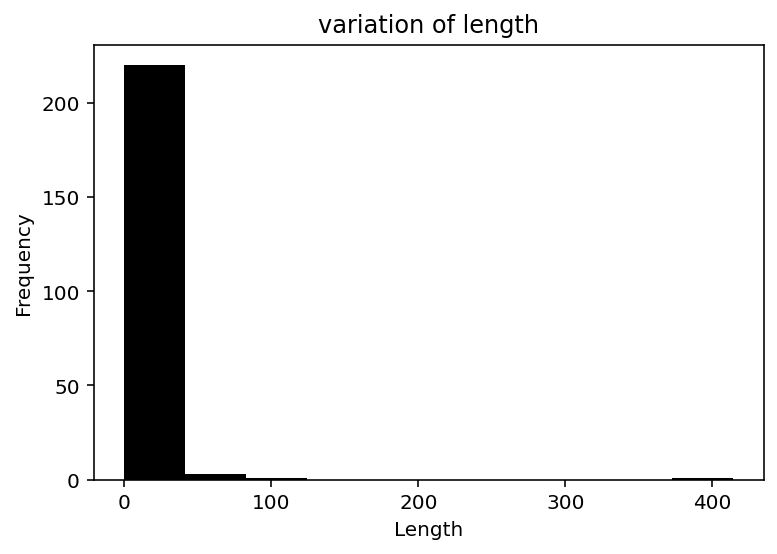

In [55]:
data.groupby('len').mean()['favourite_count'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

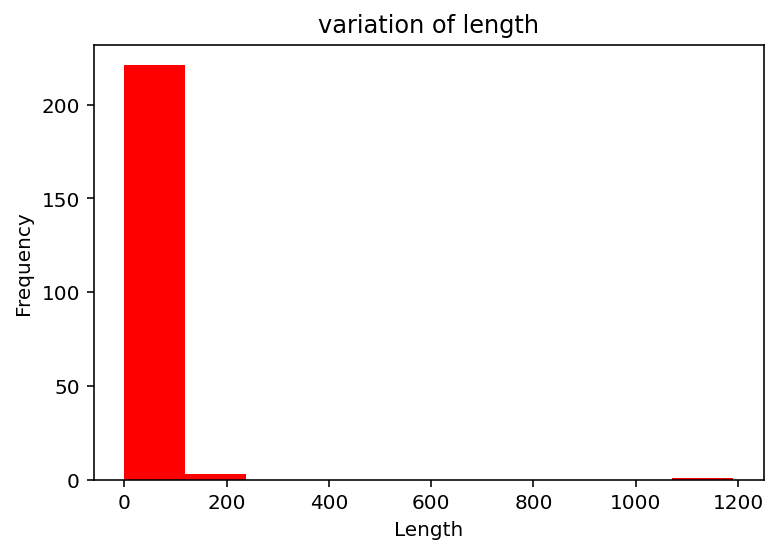

In [56]:
data.groupby('len').mean()['retweet_count'].plot.hist(color = 'red', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

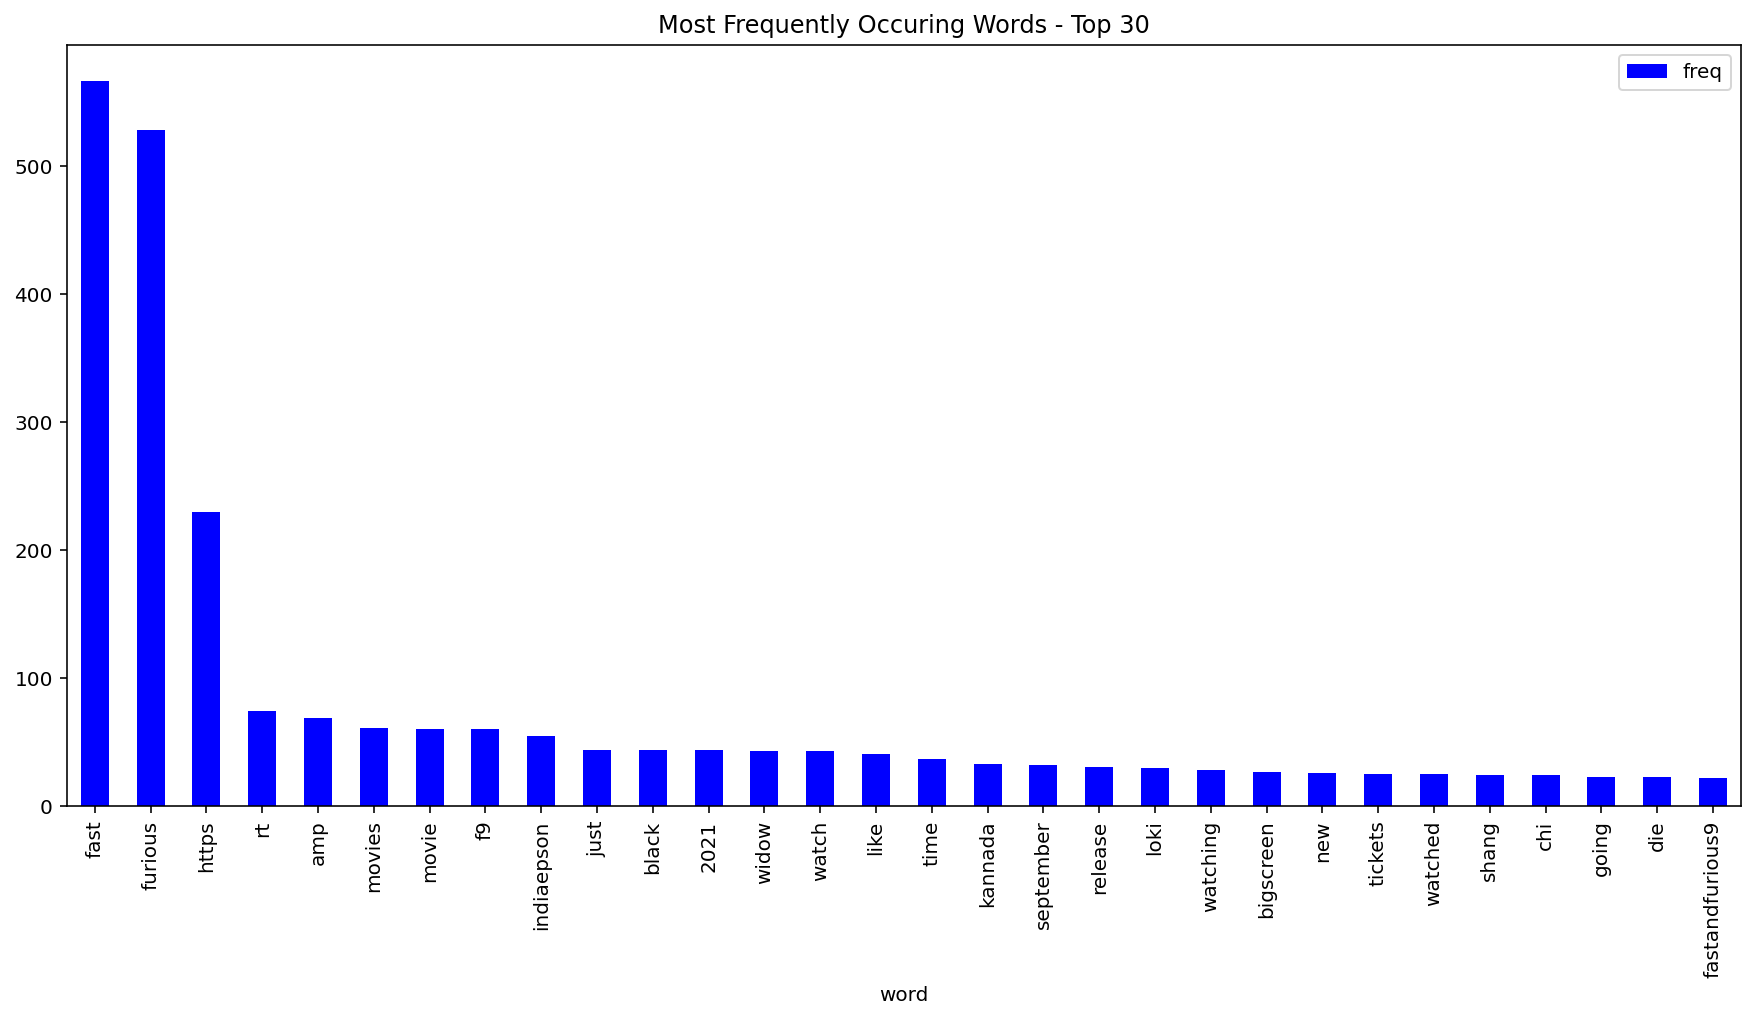

In [57]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

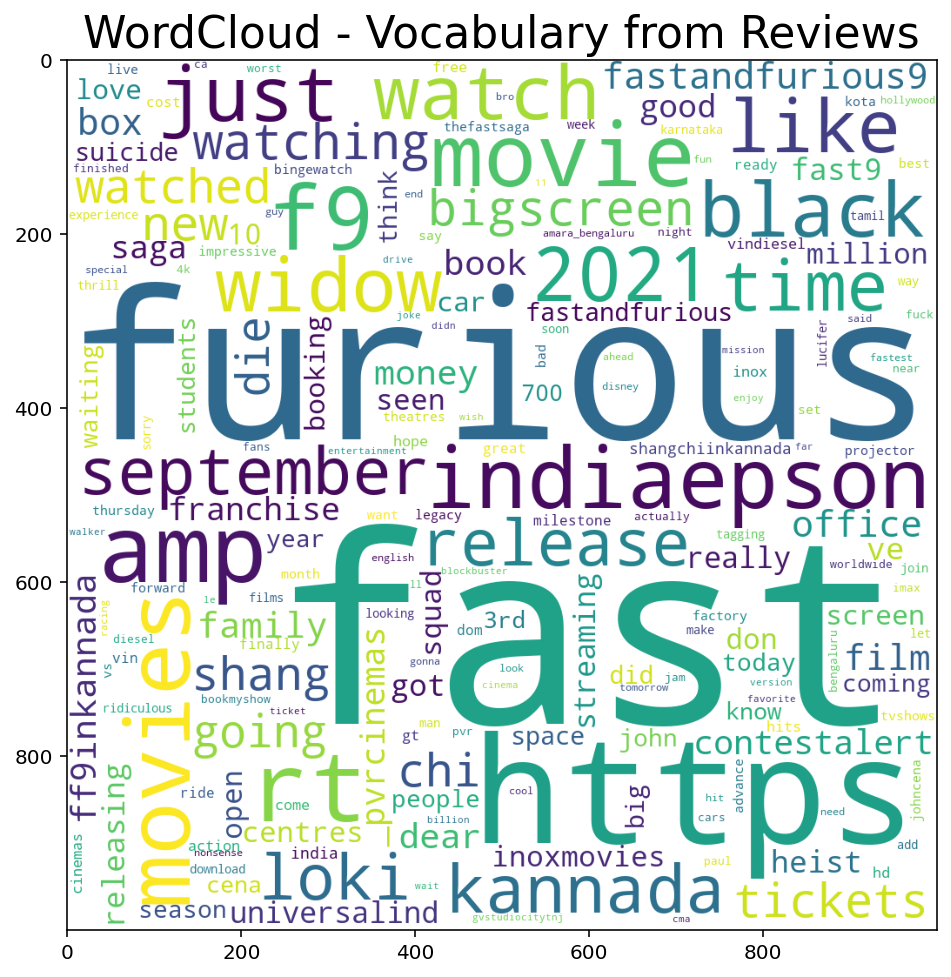

In [58]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

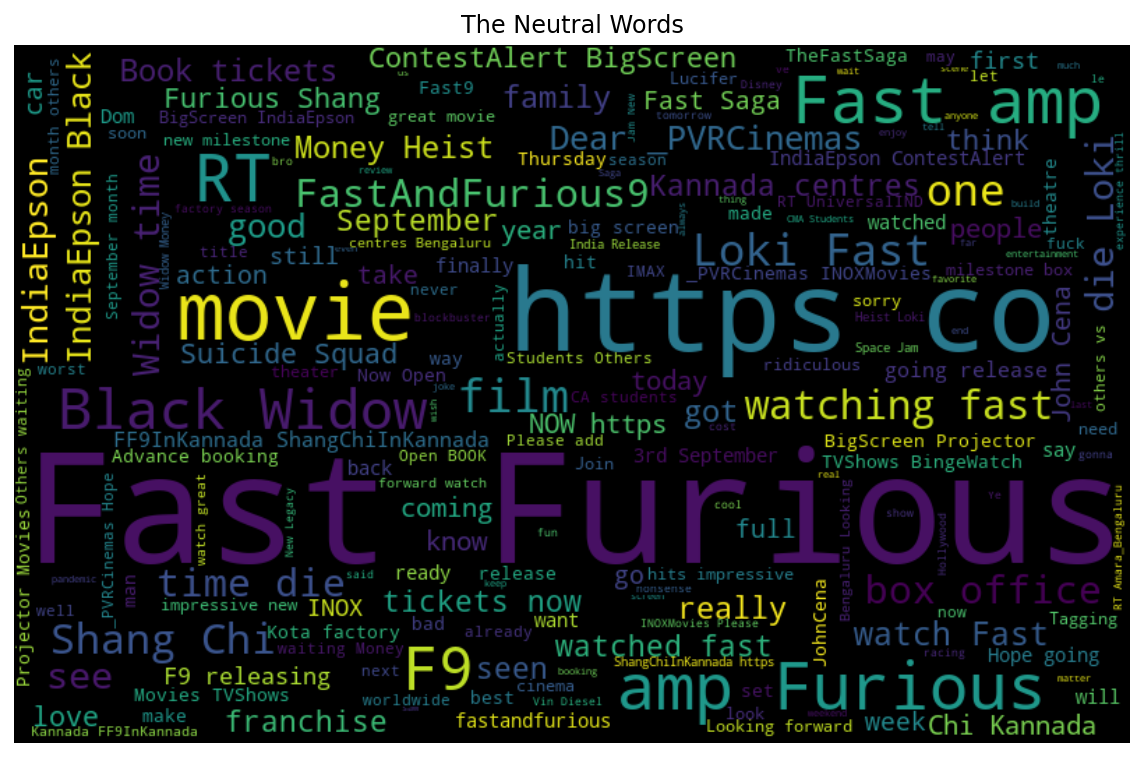

In [59]:
normal_words =' '.join([text for text in data['text']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

***clustering*** 

In [60]:
from textblob import TextBlob

In [61]:
TextBlob('Still enjoying watching fast & furious. the best movie of all the time...').sentiment

Sentiment(polarity=0.5666666666666667, subjectivity=0.5)

In [ ]:
c=TextBlob("")

In [62]:
def calculate_sentiment(Clean_text):
    return TextBlob(Clean_text).sentiment

In [63]:
def calculate_sentiment_analyser(Clean_text):    
    return analyser.polarity_scores(Clean_text)

In [65]:
data['sentiment']=data.Clean_text.apply(calculate_sentiment)
data['sentiment_analyser']=data.Clean_text.apply(calculate_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(data)),columns= ['compound_score','compound_score_sentiment'])

for i in range(0,len(data)): 
  s['compound_score'][i] = data['sentiment_analyser'][i]['compound']
  
  if (data['sentiment_analyser'][i]['compound'] <= -0.05):
    s['compound_score_sentiment'][i] = 'Negative'    
  if (data['sentiment_analyser'][i]['compound'] >= 0.05):
    s['compound_score_sentiment'][i] = 'Positive'
  if ((data['sentiment_analyser'][i]['compound'] >= -0.05) & (data['sentiment_analyser'][i]['compound'] <= 0.05)):
    s['compound_score_sentiment'][i] = 'Neutral'
    
data['compound_score'] = s['compound_score']
data['compound_score_sentiment'] = s['compound_score_sentiment']
data.head(4)

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text,Clean_text_length,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,0,I’m watching Fast 9. And a car got hit on the ...,0,0,2021-09-01 23:10:31,138,watch fast left tail flip into defund fast fur...,64,"(0.13333333333333333, 0.39999999999999997)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,Neutral
1,1,Fast and Furious 9 is one of the most ridiculo...,1,0,2021-09-01 22:04:24,71,fast furiou most ridicul film ever seen,39,"(0.35, 0.55)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,Neutral
2,2,RT @da13thsun: Th Soul may desire to test driv...,0,36,2021-09-01 21:53:32,140,soul desir test drive better bodi like love be...,76,"(0.5, 0.55)","{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'comp...",0.8625,Positive
3,4,Fast and Furious 9 is releasing from Today at ...,15,1,2021-09-01 21:35:03,271,fast furiou releas from today ticket book go t...,165,"(0.2, 0.6)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,Neutral


In [66]:
data.to_csv('fast and furious 9_result.csv')

In [ ]:
data.compound_score_sentiment.value_counts()